# Анализ бизнес-показателей приложения Procrastinate Pro+

# Оглавление   
[1 Описание проекта](#description)   
[2 Загрузка данных и подготовка их к анализу](#preparing)    
[2.1  Выводы по разделу](#conclusion1)    
[3  Функции для расчёта и анализа LTV, ROI, удержания и конверсии](#functions)   
[3.1  Функция создания пользовательских профилей](#get_profiles)    
[3.2  Функция расчёта удержания](#get_retention)    
[3.3  Функция расчёта конверсии](#get_conversion)    
[3.4  Функция расчёта LTV и ROI](#get_ltv)   
[3.5  Функция сглаживания данных](#filter_data)   
[3.6  Функция построения графика удержания](#plot_retention)   
[3.7  Функция построения графика конверсии](#plot_conversion)   
[3.8  Функции визуализации LTV и ROI](#plot_ltv_roi)  
[3.9  Выводы по разделу](#conclusion2)    
[4  Исследовательский анализ данных](#research)    
[4.1  Профили пользователей](#research_profiles)        
[4.2  Распределение пользователей по странам](#research_region)    
[4.3  Используемые клиентами устройства](#research_device)    
[4.4  Рекламные источники привлечения клиентов](#research_channel)   
[4.5  Выводы по разделу](#conclusion3)   
[5  Маркетинг](#marketing)   
[5.1  Общая сумма расходов на маркетинг и распеределение трат по каналам](#marketing_total)   
[5.2  Распределение затарт на рекламу по каналам](#marketing_channel)  
[5.3  Изменение расходов во времени](#marketing_in_time)  
[5.4  Средняя стоимость привлевения пользователя](#marketing_CAC)   
[5.5  Выводы по разделу](#conclusion4)   
[6  Оценка окупаемости рекламы](#payback)   
[6.1  Окупаемость рекламы](#payback_total)    
[6.2  Конверсия и её динамика](#conversuon_total)    
[6.3  Конверсия и её динамика по каналам привлечения](#conversuon_channel)    
[6.4  Конверсия и её динамика по странам](#conversuon_region)    
[6.5  Конверсия и её динамика по устройствам](#conversuon_device)    
[6.6  Удержание и его динамика](#retention_total)    
[6.7  Удержание и его динамика по каналам](#retention_channel)    
[6.8  Удержание и его динамика по странам](#retention_region)    
[6.9  Удержание и его динамика по устройствам](#retention_device)    
[6.10  Окупаемость рекламы с разбивкой по устройствам](#payback_device)      
[6.11  Окупаемость рекламы с разбивкой по странам](#payback_region)   
[6.12  Окупаемость рекламы с разбивкой по рекламным каналам](#payback_channel)   
[6.13  Выводы по разделу](#conclusion5)     
[7  Результаты исследования](#result)    

### Описание проекта <a id="description"></a>

Развлекательное приложение Procrastinate Pro+ несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки, необходимо разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
 - Лог сервера с данными об их посещениях - visits_info_short.csv
 - Выгрузка их покупок за этот период - orders_info_short.csv
 - Рекламные расходы - costs_info_short.csv
 
Входе исследования нужно найти ответы на следующие вопросы:
- Откуда приходят пользователи и какими устройствами они пользуются?
- Сколько стоит привлечение пользователей из различных рекламных каналов?
- Сколько денег приносит каждый клиент?
- Когда расходы на привлечение клиента окупаются?
- Какие факторы мешают привлечению клиентов?

Исследование проведём в несколько этапов:
- Загрузка данных и подготовка их к анализу
- Подготовка функций для расчёта и анализа LTV, ROI, удержания и конверсии.
- Исследовательский анализ данных
- Маркетинг
- Оценка окупаемости рекламы
- Выводы

### Загрузка данных и подготовка их к анализу <a id="preparing"></a>

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
%matplotlib inline

Загружаем данные о тратах на рекламу.

In [99]:
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    costs = pd.read_csv('costs_info_short.csv')

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Данные о рекламе содержат следующую информацию:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

Исправим названия столбцов и проверим пропуски.

In [100]:
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Пропуски отсутствуют, проверим данные на наличие дубликатов.

In [101]:
costs[costs.duplicated(subset=['dt', 'channel'], keep=False)]['costs'].count()

0

Дубликаты отсутствуют.

In [102]:
costs.head(5)

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Загрузим файл с информацией о посещениях сайта.

In [103]:
try: 
    sessions = pd.read_csv('/datasets/visits_info_short.csv')  
except:
    sessions = pd.read_csv('visits_info_short.csv')
    
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Данные о сессиях содержат следующую информацию:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Исправим названия столбцов и проверим пропуски.

In [104]:
sessions.columns = [x.lower().replace(' ', '_') for x in sessions.columns.values]

sessions.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Пропуски отсутствуют, проверим данные на наличие дубликатов.

In [105]:
sessions[sessions.duplicated(subset=['user_id', 'session_start'], keep=False)]['session_end'].count()

0

Дубликаты отсутствуют.

In [106]:
sessions.head(5)

user_id         region   device  channel        session_start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

Загрузим данные о заказах.

In [107]:
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv')  
except:
    orders = pd.read_csv('orders_info_short.csv')
    
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Данные о заказах содержат следующую информацию:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Исправим названия столбцов и проверим пропуски.

In [108]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]

orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

Пропуски отсутствуют, проверим данные на наличие дубликатов.

In [109]:
orders[orders.duplicated(subset=['user_id', 'event_dt'], keep=False)]['revenue'].count()

0

Дубликаты отсутствуют.

In [110]:
orders.head(5)

user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

Преобразуем данные о времени в формат datetime.

In [111]:
costs['session_date'] = pd.to_datetime(costs['dt'])
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

#### Вывод: <a id="conclusion1"></a>
Загрузка данных прошла без ошибок, пропуски и дубликаты отсутствуют. Данные имеют выборку, достаточную для проведения исследования. Данные о времени приведены к формату datetime. Названия столбцов приведены к единому формату. Предоставленная информация была сохранена и подготовленна для дальнейшей обработки.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии. <a id="functions"></a>     
Подготовим функции для дальнейших расчётов и визуализации данных.

#### Функция создания профилей пользователей. <a id="get_profiles"></a>

In [112]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

#### Функция расчёта Retention Rate. <a id="get_retention"></a>

In [113]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция расчёта конверсии. <a id="get_conversion"></a>

In [114]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция расчёта LTV и ROI. <a id="get_ltv"></a>

In [115]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция сглаживания данных. <a id="filter_data"></a>

In [116]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция построения графика удержания. <a id="plot_retention"></a>

In [117]:
def plot_retention(retention, retention_history, horizon):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(1, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке — динамика удержания платящих
    ax2 = plt.subplot(1, 2, 2)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean'
    ).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()

    plt.show()

#### Функция построения графика конверсии. <a id="plot_conversion"></a>

In [118]:
def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция визуализации LTV и ROI. <a id="plot_ltv_roi"></a>

In [119]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Вывод: <a id="conclusion2"></a>
Для дальнейшего исследования подготовлены функции создания профилей пользователей и вычисления значений метрик: Retention Rate, конверсии, LTV. А также функции для построения графиков Retention Rate, конверсии, LTV, ROI и сглаживания данных.

### Исследовательский анализ данных <a id="research"></a>

#### Профили пользователей <a id="research_profiles"></a>

Подготовим профили пользователей для проведения исследования.

In [120]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
events = orders
events['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = costs['session_date'].dt.date

profiles = get_profiles(sessions, orders, events, costs)

profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt               month  payer  acquisition_cost  
0  2019-05-07 2019-05-07 20:58:57   True          1.088172  
1  2019-07-09 2019-07-09 12:46:07  False          1.107237  
2  2019-10-01 2019-10-01 09:58:33  False          0.000000  
3  2019-08-22 2019-08-22 21:35:48  False          0.988235  
4  2019-10-02 2019-10-02 00:07:44  False          0.230769

In [121]:
print('Количество уникальных пользователей', len(profiles))

max_acquisition_date = profiles.reset_index()['first_ts'].dt.date.max()

print('максимальная дата привлечения пользователей', max_acquisition_date)

min_acquisition_date = profiles.reset_index()['first_ts'].dt.date.min()

print('минимальная дата привлечения пользователей', min_acquisition_date)

Количество уникальных пользователей 150008
максимальная дата привлечения пользователей 2019-10-27
минимальная дата привлечения пользователей 2019-05-01


Сформированы 150008 профилей с неоходимой для исследования информацией: дата и канал привлечения, используемое устройсво и страна проживания, идентификатор совершения покупки и стоимость привлечения клиента. Максимальная дата привлечения пользователей - 2019-10-27, минимальная дата привлечения пользователей - 2019-05-01.

#### Распределение пользователей по странам. <a id="research_region"></a>

In [122]:
def payers_part(target):
    result_table = (profiles.groupby(target).agg({'user_id' : 'nunique', 'payer' : 'sum'})
                    .sort_values(by='user_id', ascending=False))
    result_table['payers_part'] = (result_table['payer'] / result_table['user_id']).apply('{:.1%}'.format)
    return result_table

payers_part('region')

user_id  payer payers_part
region                                   
United States   100002   6902        6.9%
UK               17575    700        4.0%
France           17450    663        3.8%
Germany          14981    616        4.1%

Больше всего пользователей приходит из Соединённых штатов, количество плаятщих пользователей в США также на порядок выше других стран, а доля платящих пользователей составляет 6.9%, что является максимальным показателем по странам.

#### Используемые клиентами устройства.  <a id="research_device"></a>

In [123]:
payers_part('device')

user_id  payer payers_part
device                             
iPhone     54479   3382        6.2%
Android    35032   2050        5.9%
PC         30455   1537        5.0%
Mac        30042   1912        6.4%

Чаще всего клиенты используют iPhone, и количество платящих клиентов среди его пользователей также максимальное, но доля платящих клиентов выше всех у пользователей Mac - 6.4%.

#### Рекламные источники привлечения клиентов. <a id="research_channel"></a>

Для изучения результатов маркетинговой политики исключим пользователей, пришедших не из рекламных источников.

In [124]:
profiles = profiles.query('channel != "organic"')

payers_part('channel')

user_id  payer payers_part
channel                                       
FaceBoom              29144   3557       12.2%
TipTop                19561   1878        9.6%
OppleCreativeMedia     8605    233        2.7%
LeapBob                8553    262        3.1%
WahooNetBanner         8553    453        5.3%
RocketSuperAds         4448    352        7.9%
MediaTornado           4364    156        3.6%
YRabbit                4312    165        3.8%
AdNonSense             3880    440       11.3%
lambdaMediaAds         2149    225       10.5%

Больше всего пользователей привлекли каналы FaceBoom и TipTop, доля платящих клиентов из этих каналов также довольно высока: 12.2% и 9.6% соответственно.

#### Выводы <a id="conclusion3"></a>
Сформированы 150008 профилей с информацией о дате и канел привлечения, используемом устройсве и стране проживания, идентификаторе совершения покупки и стоимости привлечения клиента. Максимальная дата привлечения пользователей - 2019-10-27, минимальная дата привлечения пользователей - 2019-05-01. Больше всего пользователей приходит из Соединённых штатов, количество плаятщих пользователей в США также на порядок выше других стран, а доля платящих пользователей составляет 6.9%, что является максимальным показателем по странам. Чаще всего клиенты используют iPhone, и количество платящих клиентов среди его пользователей также максимальное, но доля платящих клиентов выше всех у пользователей Mac - 6.4%. Больше всего пользователей привлекли каналы FaceBoom и TipTop, доля платящих клиентов из этих каналов также довольно высока: 12.2% и 9.6% соответственно.

### Маркетинг <a id="marketing"></a>

#### Общая сумма расходов на маркетинг. <a id="marketing_total"></a>

In [125]:
print('Общая сумма расходов на маркетинг:', int(costs["costs"].sum()))

Общая сумма расходов на маркетинг: 105497


#### Распределение затарт на рекламу по каналам. <a id="marketing_channel"></a>

In [126]:
channels_cost = costs.groupby('channel').agg({'costs' : 'sum'}).sort_values(by='costs', ascending=False)
channels_cost

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

Больше всего средств было затрачено на привлечение клиентов из каналов TipTop и FaceBoom (54751.30 и 32445.60 соответственно), затраты на другие каналы на порядок меньше.

#### Изменение расходов во времени. <a id="marketing_in_time"></a>

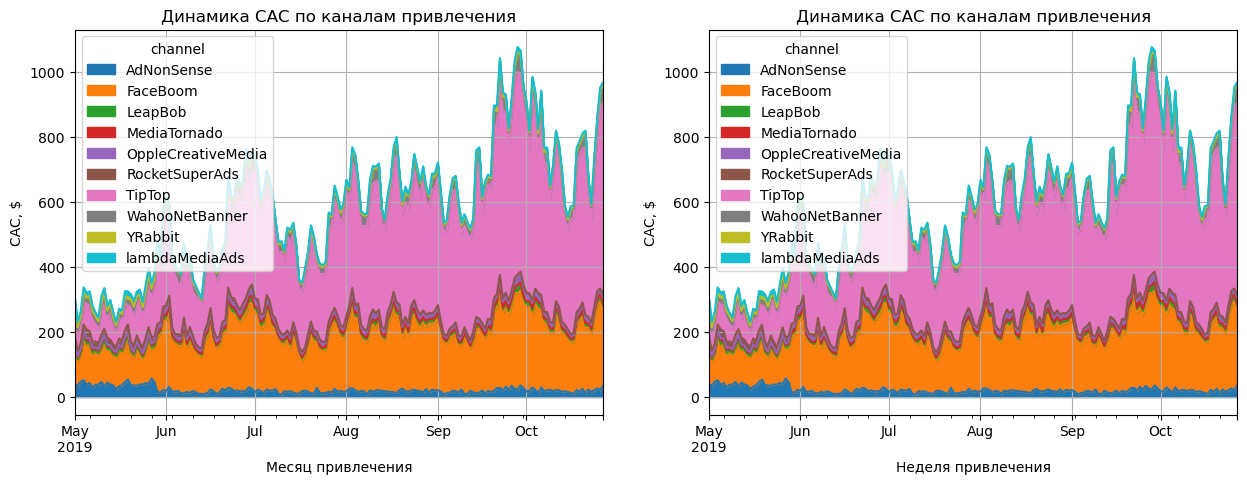

In [127]:
costs['session_month'] = costs['session_date'].astype('datetime64[M]')
costs['session_week'] = costs['session_date'].astype('datetime64[W]')

plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
    
costs.pivot_table(
index='session_month', columns='channel', values='costs', aggfunc='sum'
).plot.area(grid=True, ax=ax1)
plt.ylabel('CAC, $')
plt.xlabel('Месяц привлечения')
plt.title('Динамика САС по каналам привлечения')

ax2 = plt.subplot(1, 2, 2)
    
costs.pivot_table(
index='session_week', columns='channel', values='costs', aggfunc='sum'
).plot.area(grid=True, ax=ax2)
plt.ylabel('CAC, $')
plt.xlabel('Неделя привлечения')
plt.title('Динамика САС по каналам привлечения')

plt.show()

Рекламные расходы на каналы FaceBoom и TipTop с июня покзаывают значительный рост - в два раза для  FaceBoom и в 4 раза для TipTop, финансирование отсталных источников привлечения клиентов сохраняется на одном уровне.

#### Средняя стоимость привлевения пользователя. <a id="marketing_CAC"></a>

In [128]:
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False).apply('{:.2}'.format)

channel
TipTop                 2.8
FaceBoom               1.1
AdNonSense             1.0
lambdaMediaAds        0.72
WahooNetBanner         0.6
RocketSuperAds        0.41
OppleCreativeMedia    0.25
YRabbit               0.22
MediaTornado          0.22
LeapBob               0.21
Name: acquisition_cost, dtype: object

TipTop и FaceBoom остаются лидерами и по показателю CAC (2.8 и 1.1 соответственно), незначительно по стоимости привлечения отстаёт канал AdNonSense с CAC равным 1.0 привлечение пользователей из остальных каналов обходится компании дешевле.

#### Выводы <a id="conclusion4"></a>
Общая сумма расходов на маркетинг составила 105497. Больше всего средств было затрачено на привлечение клиентов из каналов TipTop (54751.30) и FaceBoom (32445.60), затраты на другие каналы на порядок меньше. Рекламные расходы на каналы FaceBoom и TipTop с июня покзаывают значительный рост - в два раза для  FaceBoom и в 4 раза для TipTop, финансирование отсталных источников привлечения клиентов сохраняется на одном уровне. TipTop и FaceBoom остаются лидерами и по показателю CAC (2.8 и 1.1 соответственно), незначительно по стоимости привлечения отстаёт канал AdNonSense с CAC равным 1.0.

### Оценка окупаемости рекламы <a id="payback"></a>

#### Окупаемость рекламы. <a id="payback_total"></a>

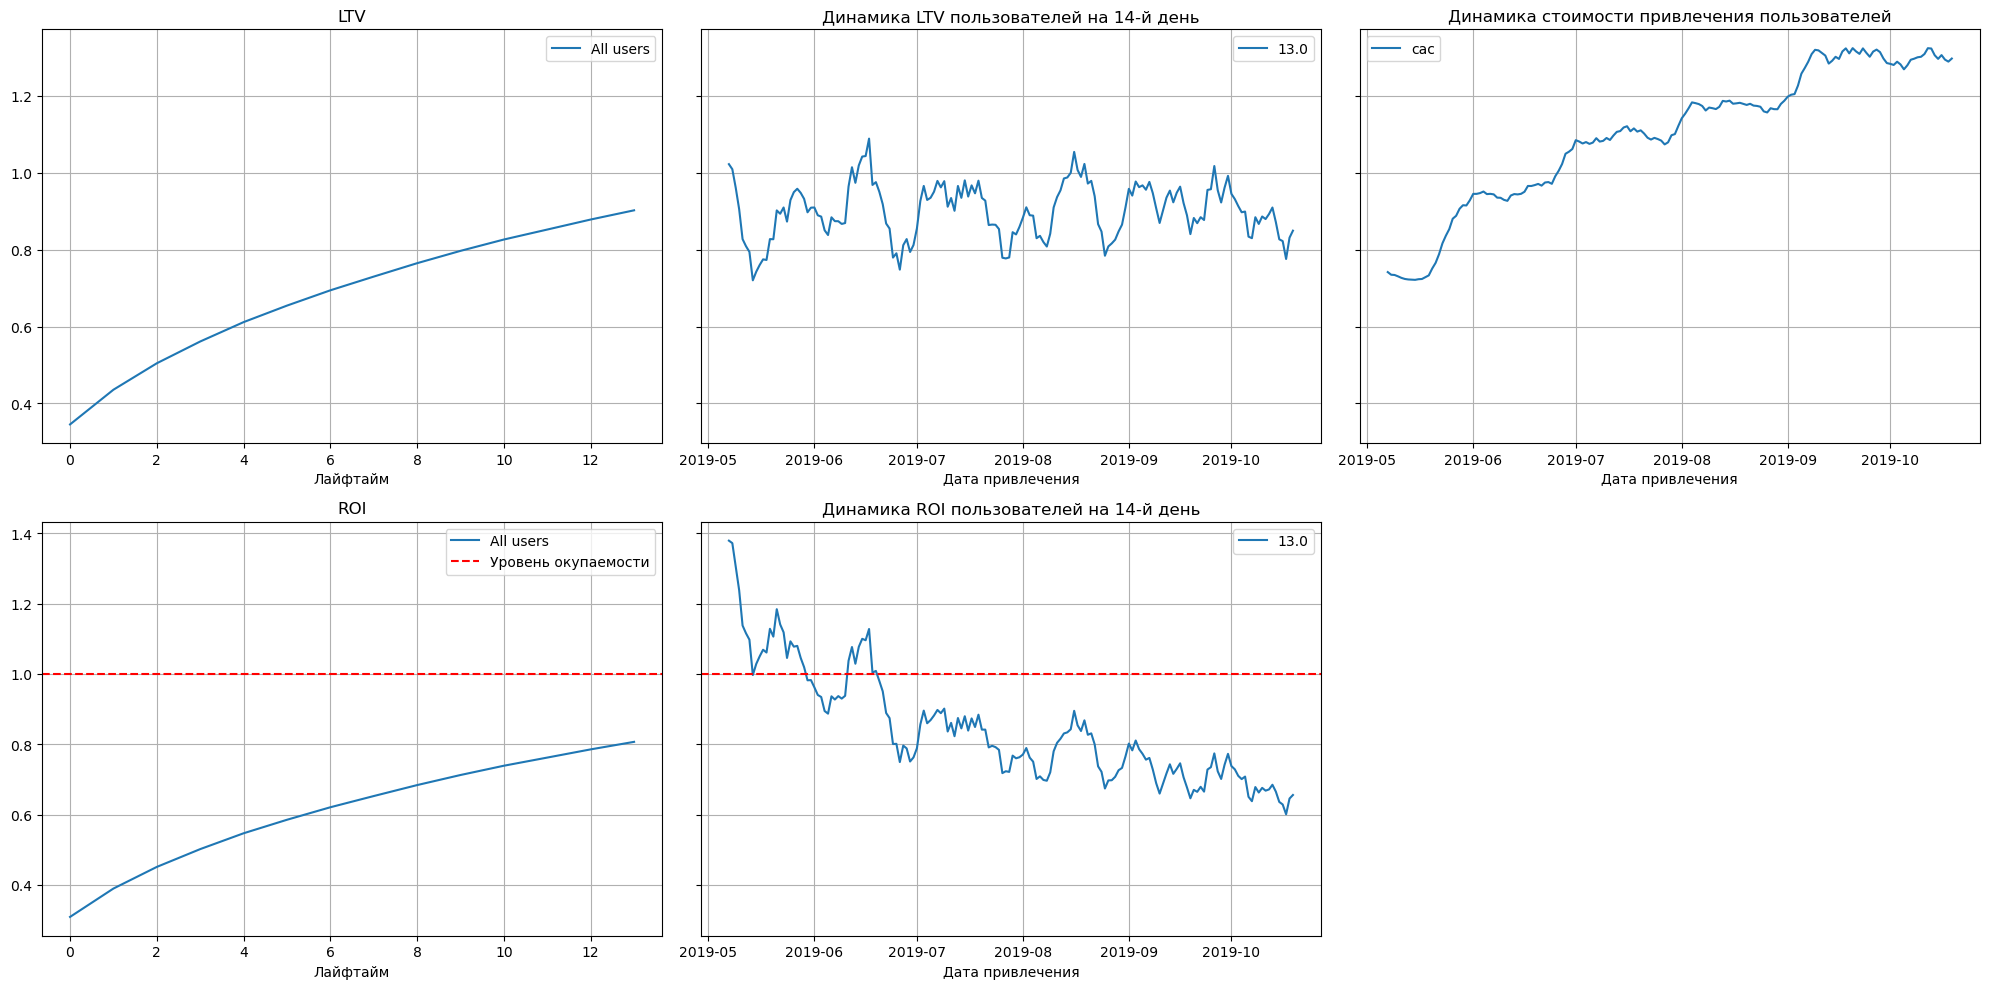

In [129]:
#считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=[]
)

# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

По графикам можно сделать такие выводы:
Реклама не окупается. ROI не поднимается выше 80%.
CAC стабильно растёт. Возможно, дело в увеличении рекламного бюджета.
На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().

#### Конверсия и динамика её изменения. <a id="conversion_total"></a>

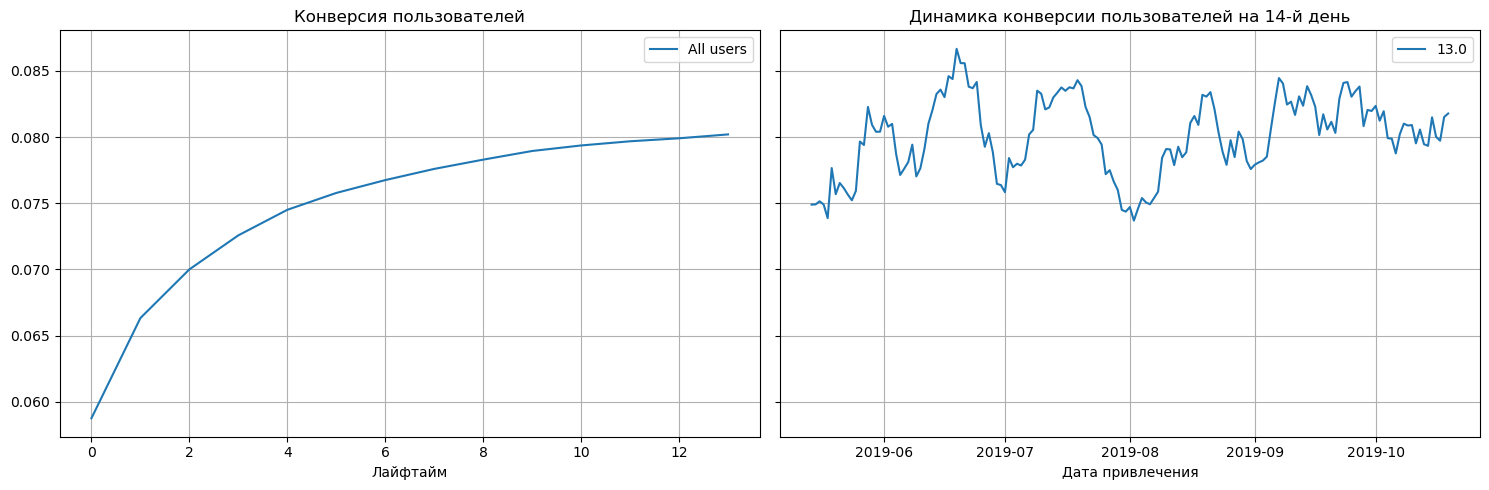

In [130]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)
    
plot_conversion(conversion, conversion_history, 14) 

Судя по графикам, пользователи конвертируются очень хорошо, причём постоянно. Посмотрим подробнее конверсию с разбивкой по рекламным каналам, странам и устройствам.

#### Конверсия и её динамика по рекламным каналам. <a id="conversion_channel"></a>

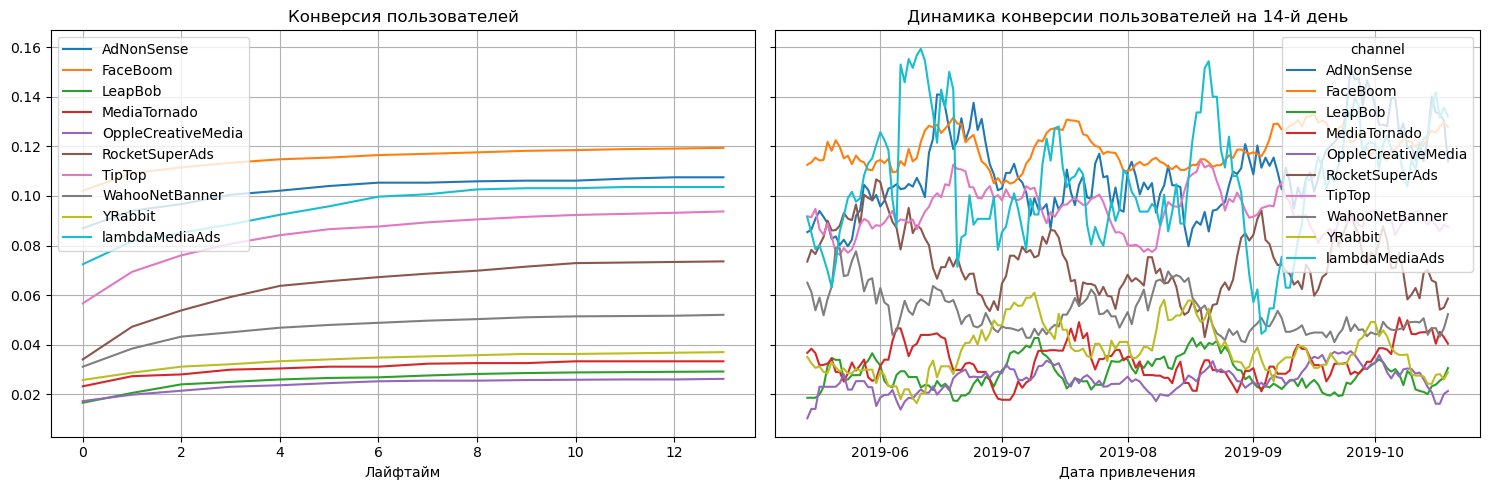

In [131]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
    
plot_conversion(conversion, conversion_history, 14) 

Наибольший вклад в повышение конверсии вносят пользователи, пришедшие из FaceBoom, AdNonSense, lambdaMediaAds и TipTop. Дополнительное привлечение пользователей из этих источников действительно может повысить прибыль компании.

#### Конверсия и её динамика по странам. <a id="conversion_region"></a>

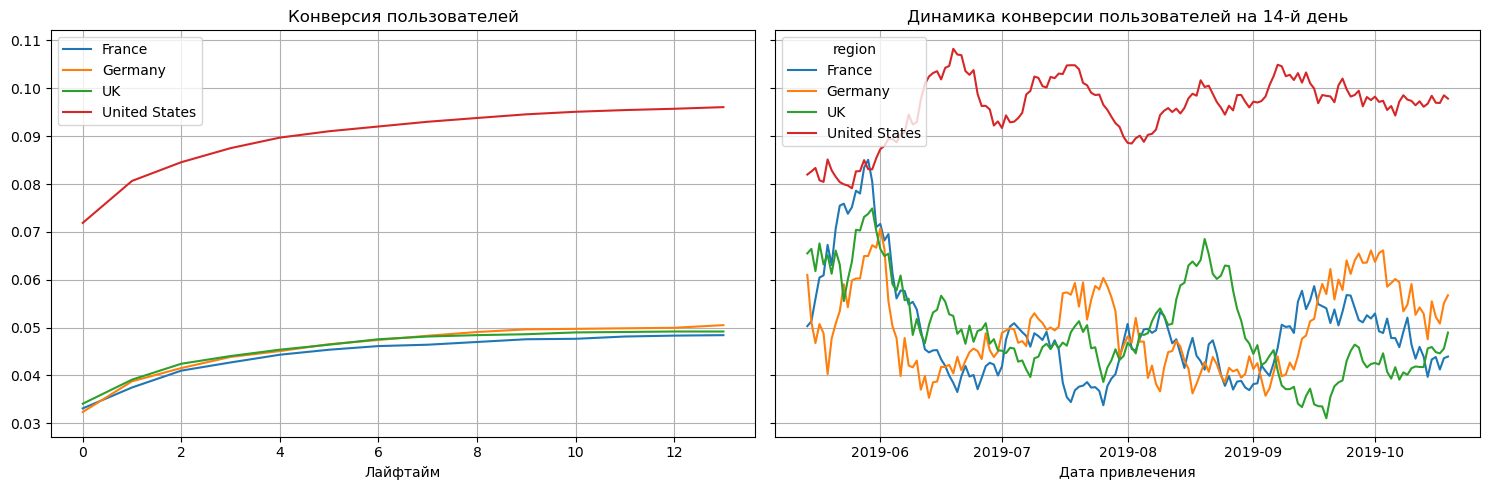

In [132]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
    
plot_conversion(conversion, conversion_history, 14) 

Конверсия пользователей из США в два раза превышает показатели других стран. Расширение рынка в США также открывает перспективы повышения прибыли.

#### Конверсия и её динамика по устройствам. <a id="conversion_device"></a>

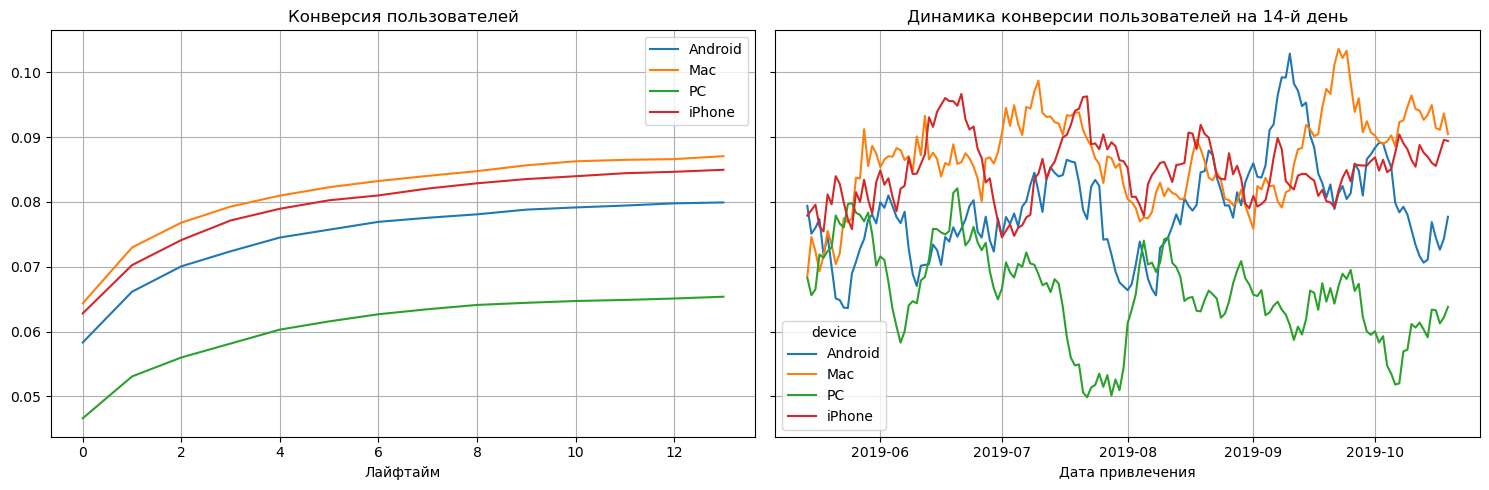

In [133]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
    
plot_conversion(conversion, conversion_history, 14) 

Конверсия по устройствам сбалансирована, из отстающих только пользователеи персональных компьютеров.

Возможно, реклама не окупается из-за низкого удержания. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

#### Удержание и динамика его изменения. <a id="retention_total"></a>

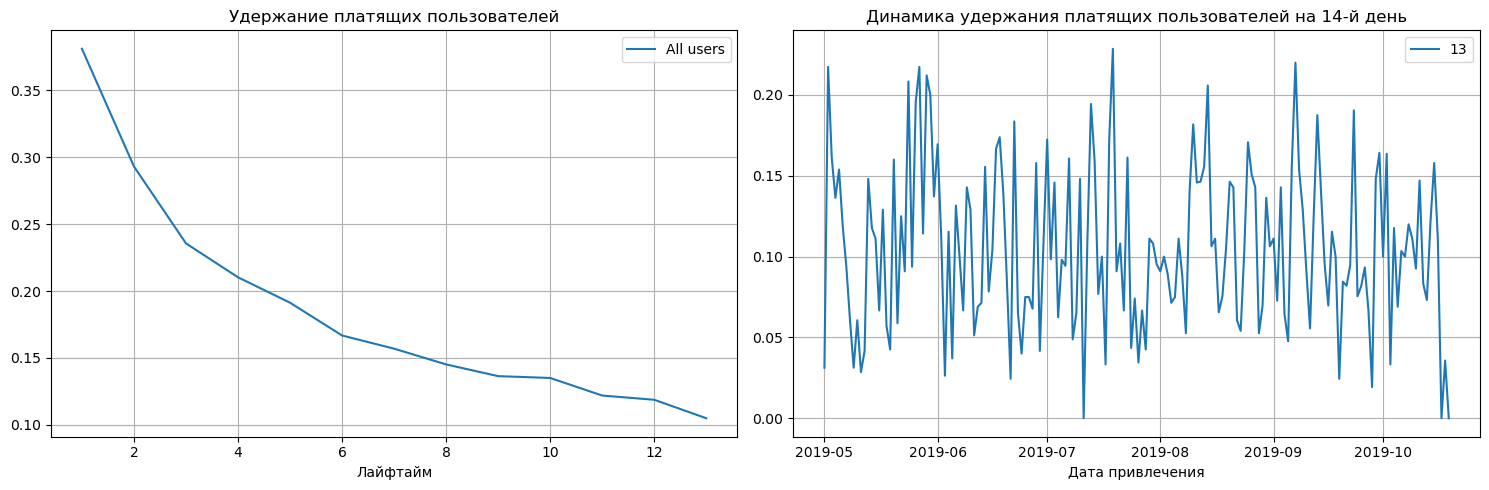

In [134]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

plot_retention(retention, retention_history, 14) 

Пользователи удерживаются стабильно.  Посмотрим подробнее удержание с разбивкой по рекламным каналам, странам и устройствам.

#### Удержание и его динамика по рекламным каналам. <a id="retention_channel"></a>

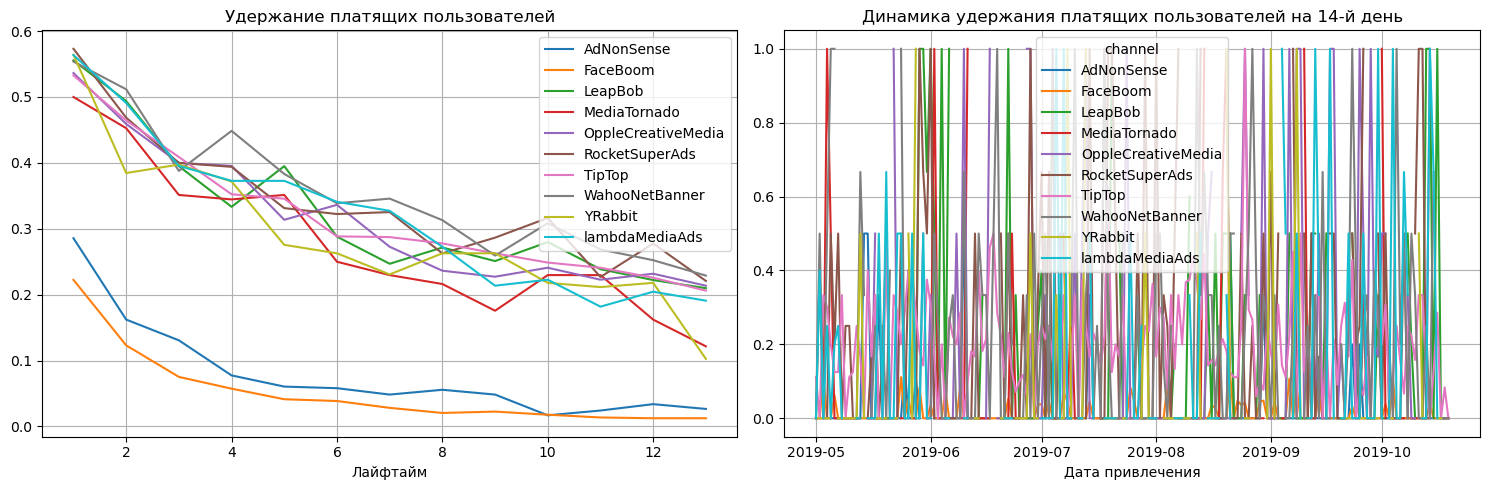

In [135]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

plot_retention(retention, retention_history, 14) 

Пользователи FaceBoom и AdNonSense несмотря на хорошую конверсию удерживаются значительно хуже других, поэтому инвестици в эти каналы следует проводить с учетом риска оттока клиентов.

#### Удержание и его динамика по странам. <a id="retention_region"></a>

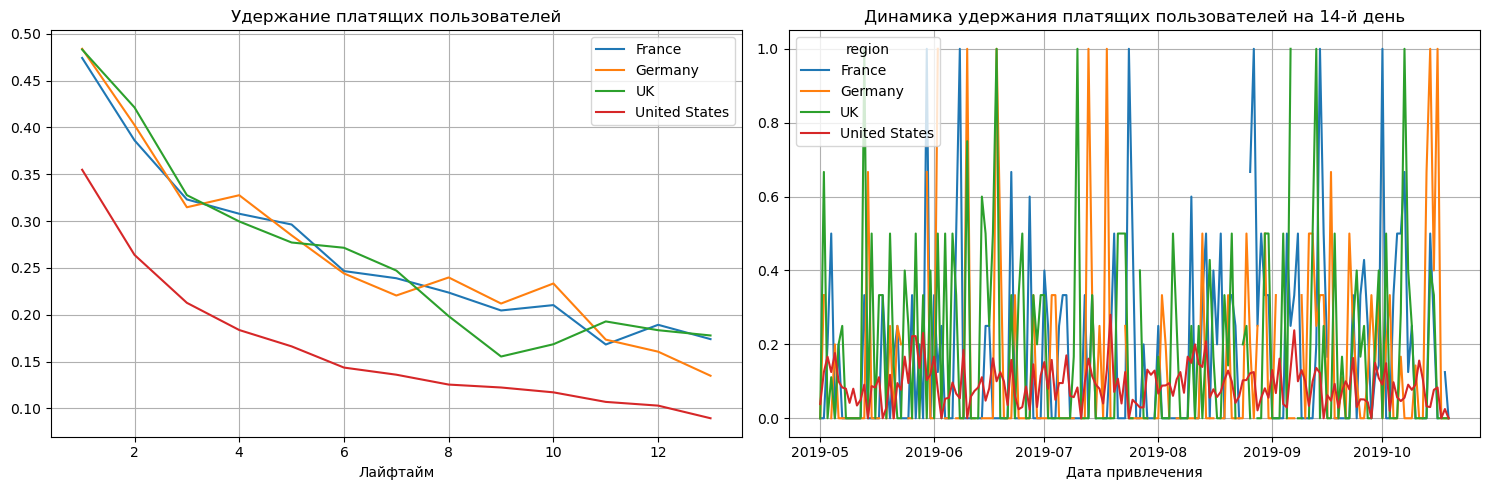

In [136]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

plot_retention(retention, retention_history, 14) 

Пользователи из США, также несмотря на хорошую конверсию плохо удерживаются, что создаёт повышенные риски для инвестиций в данном регионе.

#### Удержание и его динамика по устройствам. <a id="retention_device"></a>

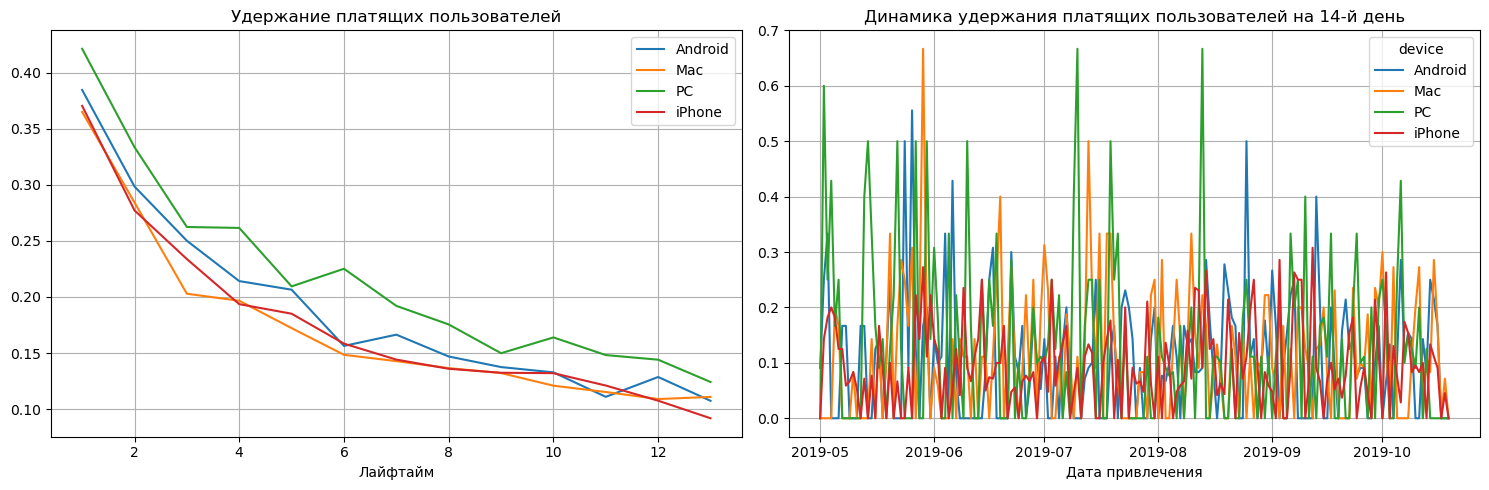

In [137]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

plot_retention(retention, retention_history, 14) 

Удержание пользователей по устройствам сбалансированно, что говорит об отсутствии технических проблем при работе приложения на разных платформах.

Чтобы разобраться в причинах отсутствия окупаемости рекламы, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения. Начнём с разбивки по устройствам: передадим параметру dimensions столбец `device`.

#### Окупаемость рекламы с разбивкой по устройствам. <a id="payback_device"></a>

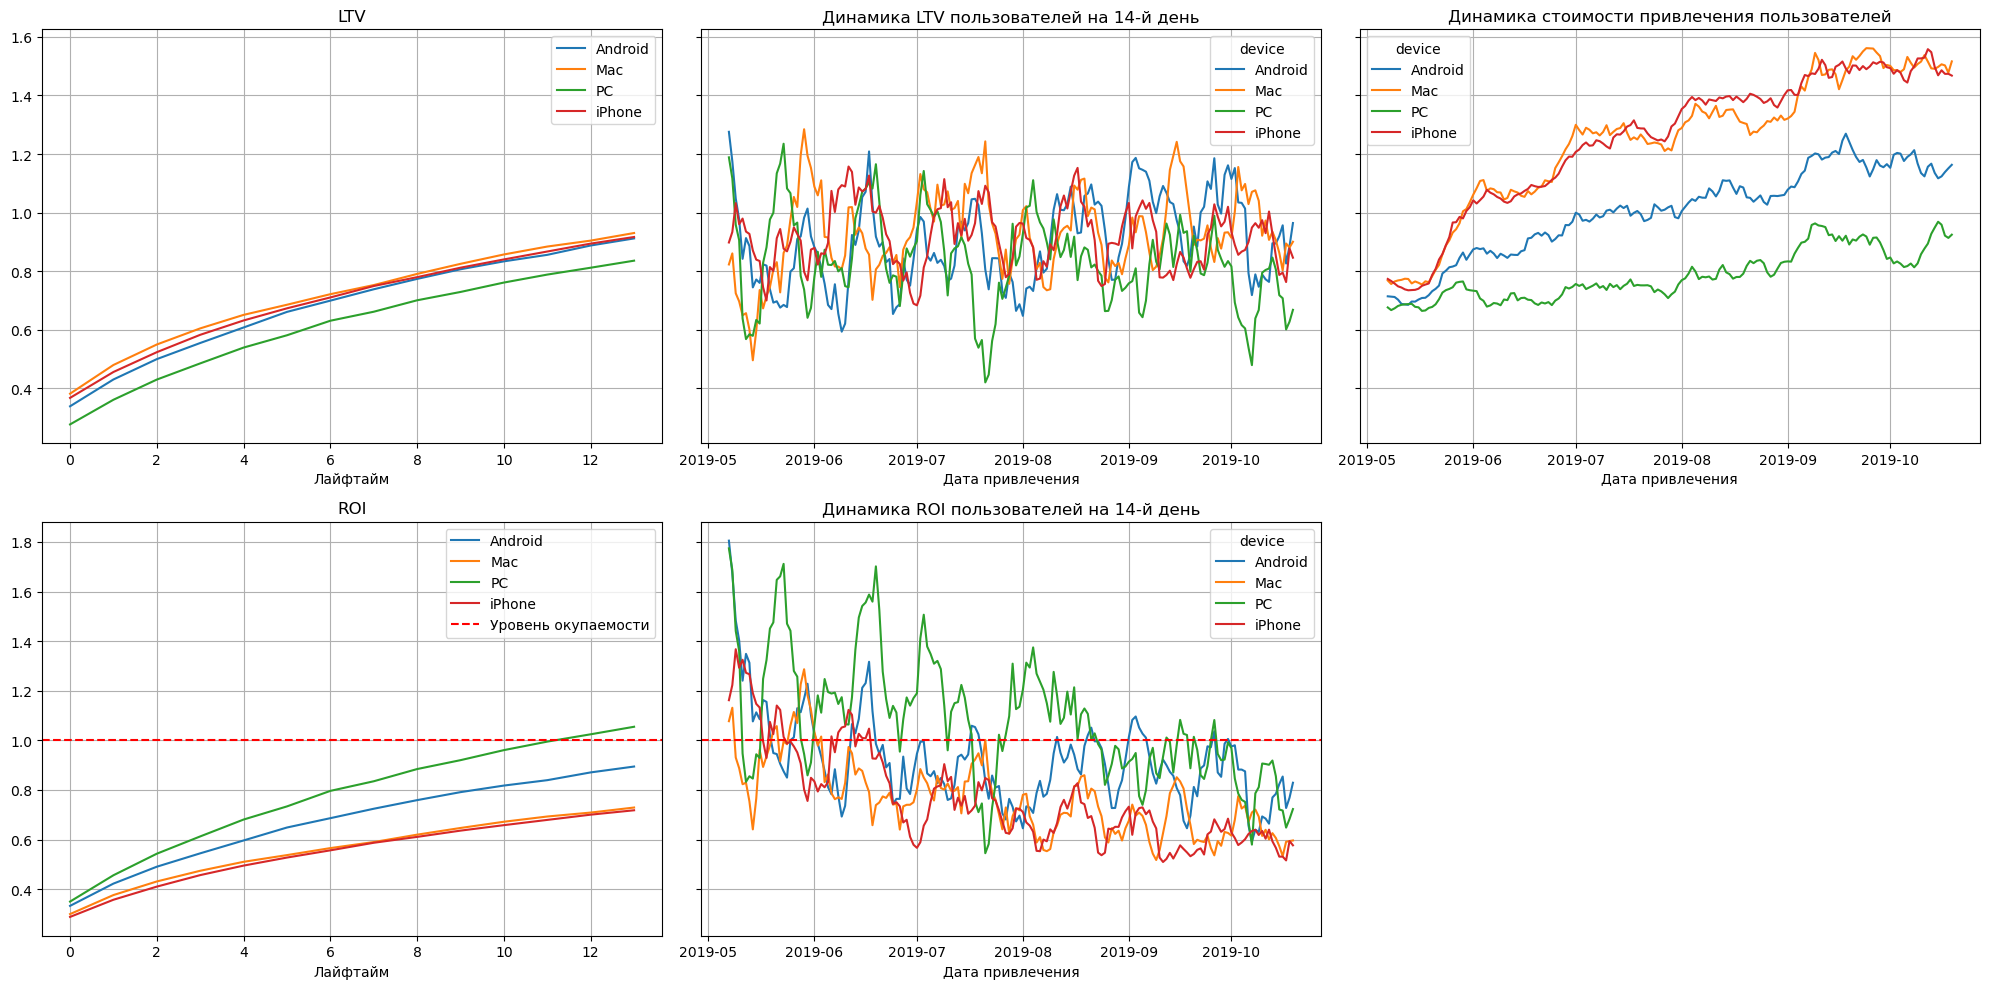

In [138]:
# считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    14,
    dimensions=['device'],
)

# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Пользователи Mac и iPhone стабильно не окупаются, и имеют самую высокую стоимость привлечения. Преодолевают порог окупаемости только пользователи PC.

#### Окупаемость рекламы с разбивкой по странам. <a id="payback_region"></a>

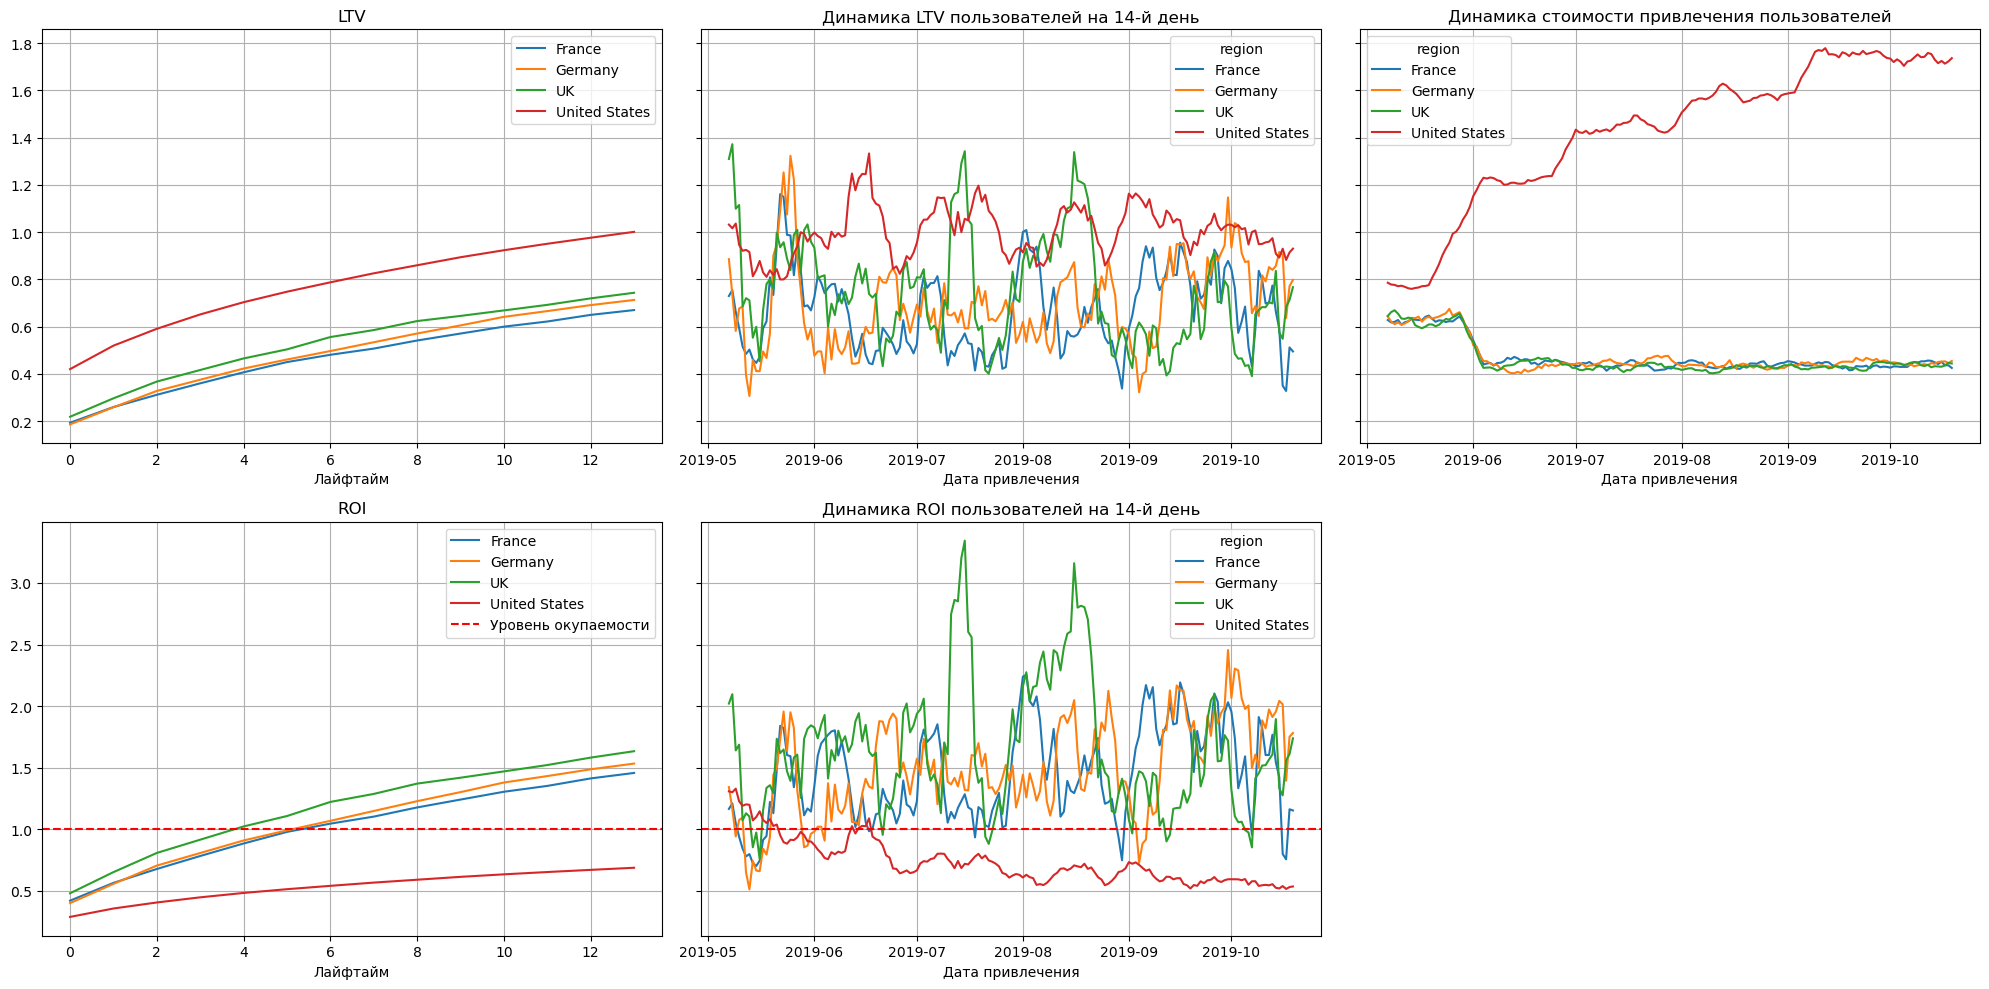

In [139]:
# считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    14,
    dimensions=['region'],
)

# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

С разбивкой по странам всё уже лучше.
Вот что говорят графики:
Реклама не окупается только в США.
Стоимость привлечения стабильна и одинакова для всех стран, кроме США, где она в разы превышает показатели других стран.
LTV всё так же подвержен сезонности, но стабилен.
Лучше всего окупается Великобритания, а вот США явный аутсайдер.
Возможно, дело в стране — эту версию нельзя исключать.

Теперь проверим источники привлечения `channel`. Возможно, на окупаемость влияет неудачная реклама в каком-нибудь одном канале.

#### Окупаемость рекламы с разбивкой по рекламным каналам. <a id="payback_channel"></a>

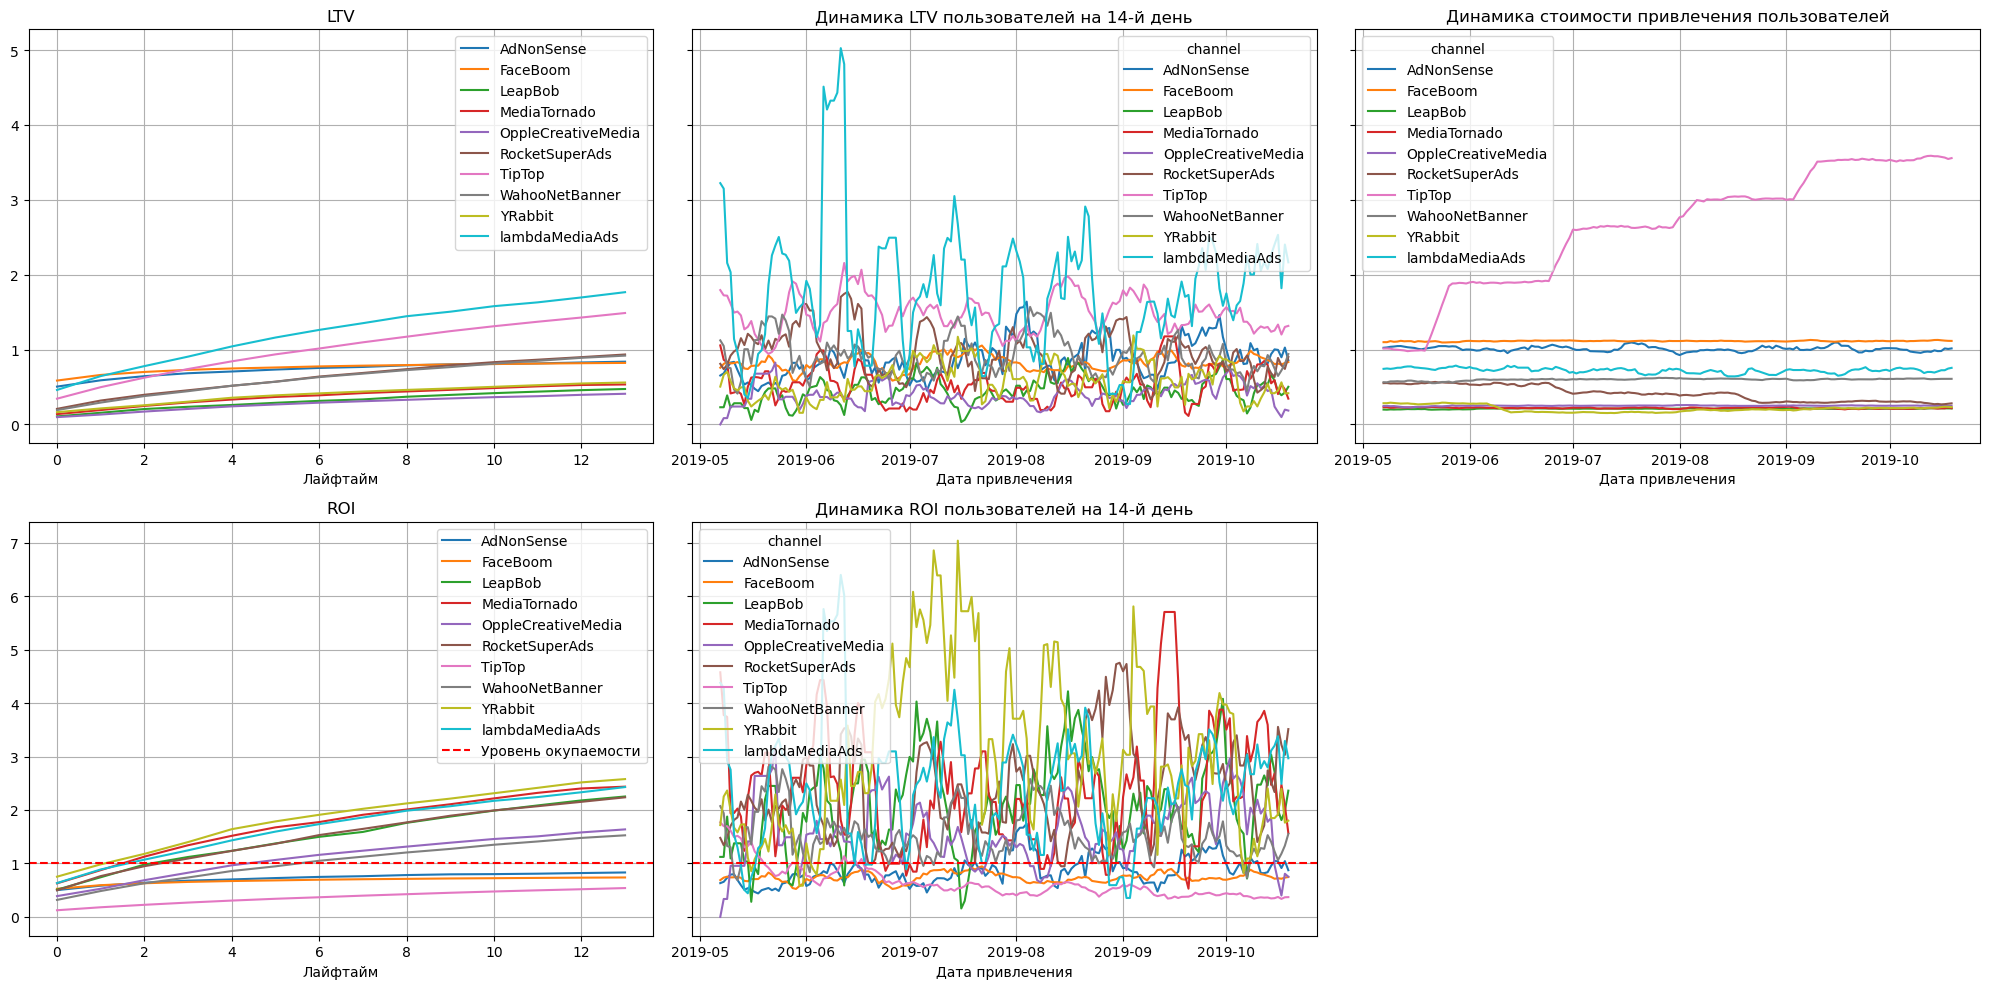

In [140]:
# считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    14,
    dimensions=['channel'],
)

# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Большая часть каналов показывает хорошую окупаемость, не преодолевают порог окупаемости только TipTop, FaceBoom и AdNonSense. Стоимость привлечения стабильна для всех каналов, кроме TipTop, где она в разы превысила показатели других каналов.

#### Выводы <a id="conclusion5"></a>
Реклама не окупается на фоне низкого значения показателя ROI (ниже 80%) и растущего CAC. При этом LTV достаточно стабилен. Значит, проблема не в ухудшении качества пользователей, а в увеличении рекламного бюджета.
Негативно повлияли на окупаемость значительные вложения в рекламный канал TipTop, не принёсшие ожидаемого роста LTV. Ставка на привлечение пользователей из США, также не позволила преодолеть порог окупаемости в этой стране из-за высокой стоимости привлечения клиентов.

Возможной причиной отсутствия окупаемости является ставка на привлечение пользователей TipTop с территории США, хоть эти пользователи и показывают самый высокий LTV и хорошую конверсию, но низкое удержание и высокая стоимость привлечения делает рекламную компанию для них довольно рискованной, и в данном случае, проведенная рекламная компания не привела к ожидаенмому росту показателей ROI и LTV.

Необходимо изменить стратегию рекламной компании для пользователей TipTop из США и сбалансировать рекламный бюджет между каналами привлечения и странами.

### Результаты исследования <a id="result"></a>

Для исследования использовались три источника данных:
- Лог сервера с данными о посещениях (309901З записей)
- Выгрузка данных о покупках (40212 операций)
- Рекламные расходы (1800 транзакций)

Загрузка данных прошла без ошибок, пропуски и дубликаты отсутствовали. Названия столбцов были преведены к единому формату, данные о времени приведены к формату datetime. Данные имели выборку, достаточную для проведения исследования. Предоставленная информация была сохранена и подготовленна для дальнейшей обработки.

На основе загруженных данных были сформированы 150008 профилей с информацией о дате и канел привлечения, используемом устройсве и стране проживания, идентификаторе совершения покупки и стоимости привлечения клиента. Максимальная дата привлечения пользователей - 2019-10-27, минимальная дата привлечения пользователей - 2019-05-01. Больше всего пользователей приходит из Соединённых штатов, количество плаятщих пользователей в США также на порядок выше других стран, а доля платящих пользователей составляет 6.9%, что является максимальным показателем по странам. Чаще всего клиенты используют iPhone, и количество платящих клиентов среди его пользователей также максимальное, но доля платящих клиентов выше всех у пользователей Mac - 6.4%. Больше всего пользователей привлекли каналы FaceBoom и TipTop, доля платящих клиентов из этих каналов также довольно высока: 12.2% и 9.6% соответственно.

Общая сумма расходов на маркетинг составила 105497$. Больше всего средств было затрачено на привлечение клиентов из каналов TipTop (54751.30) и FaceBoom (32445.60), затраты на другие каналы на порядок меньше. Рекламные расходы на каналы FaceBoom и TipTop с июня покзаывают значительный рост - в два раза для FaceBoom и в 4 раза для TipTop, финансирование отсталных источников привлечения клиентов сохраняется на однеом уровне. TipTop и FaceBoom остаются лидерами и по показателю CAC (2.8 и 1.1 соответственно), незначительно по стоимости привлечения отстал канал AdNonSense с CAC равным 1.0.

Пользователи из США принесли наибольшую выручку, в среднем до 1 доллара от пользователя, но стоимость привлечения клиента из этого региона доходила до 1,6 долларов. Пользователи, пришедшие из канала TipTop, также приносли хорошую выручку, в среднем около 1,5 долларов с пользователя, но стоимость их привлечения превысила 3$. Не преодолели порог окупаемости и каналы FaceBoom и AdNonSense, в остальных случаях затраты на рекламу окупились.

Реклама не окупилась на фоне низкого значения показателя ROI (ниже 80 процентов) и растущего CAC. При стабильном LTV. Значит, проблема не в ухудшении качества пользователей, а в увеличении рекламного бюджета. Возможной причиной отсутствия окупаемости явилась ставка на привлечение пользователей TipTop с территории США, хоть эти пользователи и показывают самый высокий LTV (более 1 доллара) и хорошую конверсию (более 9 процентов), но низкое удержание и высокая стоимость привлечения (более 1.5 долларов) делает рекламную компанию для них довольно рискованной, и в данном случае, проведенная рекламная компания не привела к ожидаенмому росту показателей ROI и LTV.

#### Вывод:

Причиной неэффективности привлечения пользователей явилось рискованное вложение средств в канал TipTop для привлечения клиентов из США. Рекламная компания, проведённая в этих условиях не принесла ожидаемого роста показателей LTV и ROI, что на фоне значителньно роста CAC сделало её убыточной.

#### Рекомендации:

Для уменьшения рисков провала рекламной компании рекомендуется проводить диверсификацию вложений в маркетинг между источниками привлечения пользователей и странами, также необходимо пересмотреть стратегию рекламной компании в TipTop для пользователей США и выяснить причину, по которой она, при значительные вложениях, не привела к ожидаемому росту LTV и ROI.